In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
from sys import modules
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Data exploration
X_data= pd.read_csv("/Users/eranbarlevy/Downloads/Regression_project_raz/data/X.csv")
y_data = pd.read_csv("/Users/eranbarlevy/Downloads/Regression_project_raz/data/y.csv")


In [94]:
#y_test.to_frame()join(y_pred)
#Copy
X_df = X_data.copy()
y_df = y_data.copy()

X_df = X_df.set_index('id')
y_df = y_df.set_index('id')
X_df.head()
y_df.head()

df = X_df.join(y_df, on = 'id') 
print(df.shape) #(5363,13))


(5363, 13)


In [95]:
#Explore nulls

pd.DataFrame(df.isna().sum()) #show all nulls in catagories

#clear nulls
df = df.dropna()
print(df.shape) #(5355,13)
print(df.info())

(5355, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 2477 to 3572
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         5355 non-null   int64  
 1   Unnamed: 0           5355 non-null   int64  
 2   Age                  5355 non-null   float64
 3   Gender               5355 non-null   object 
 4   Education Level      5355 non-null   object 
 5   Job Title            5355 non-null   object 
 6   Years of Experience  5355 non-null   float64
 7   Country              5355 non-null   object 
 8   Race                 5355 non-null   object 
 9   height               5355 non-null   float64
 10  weight               5355 non-null   float64
 11  professionalism      5355 non-null   float64
 12  Salary               5355 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 585.7+ KB
None


In [96]:
#Explore Data
#drop columns
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

##[['Gender',"Education Level", "Job Title",'Country','Race']] Category
df['Gender'].astype('category') 
df['Education Level'].astype('category')
df['Job Title'].astype('category')
df['Country'].astype('category')
df['Race'].astype('category')

##[['Age','Years of Experience','height','weight','professionalism','Salary']] Number
print(df.shape) #(5355,11))

(5355, 11)


In [99]:
df['Education Level'].value_counts()

bachelor's|degr    1830
master's|degr      1280
p                  1078
bachelor            601
high|scho           337
master              229
Name: Education Level, dtype: int64

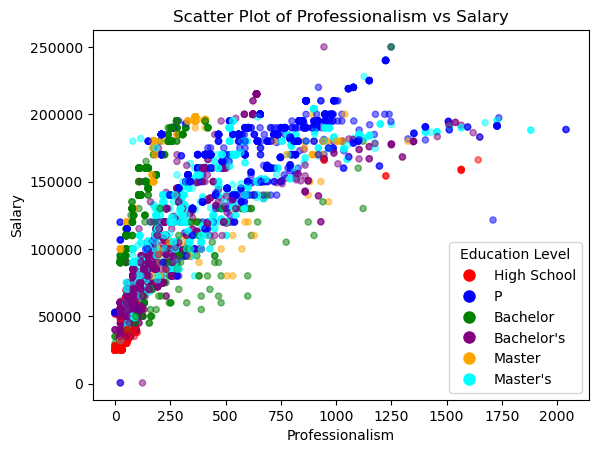

In [105]:
# Map education levels to numerical values
df['Education_encoded'] = df['Education Level'].map({"high|scho": 1,"p": 2,"bachelor": 3, "bachelor's|degr": 4, "master": 5,"master's|degr": 6})

# Define a color map for different education levels
education_color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange', 6: 'cyan'}

ax = df.plot.scatter('professionalism', 'Salary', c=df['Education_encoded'].map(education_color_map), alpha = 0.5)



#Calculate the correlation between Education_Level_Num and Salary
#correlation = df["Education_encoded"].corr(df["Salary"])

#print(f"Correlation between Education_Level and Salary: {correlation:.2f}")


plt.xlabel('Professionalism')
plt.ylabel('Salary')
plt.title('Scatter Plot of Professionalism vs Salary')

# Create a custom legend for the education levels and their colors
legend_labels = {1: "High School", 2: "P", 3: "Bachelor", 4: "Bachelor's", 5: "Master", 6: "Master's"}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels, markerfacecolor=color, markersize=10) for value, color in education_color_map.items()]
legend = plt.legend(handles=legend_handles, title="Education Level", labels=[legend_labels[value] for value in education_color_map.keys()])

# Add a title to the legend
legend.set_title("Education Level")

#plt.show()






Correlation between Education_Level and Salary: -0.37


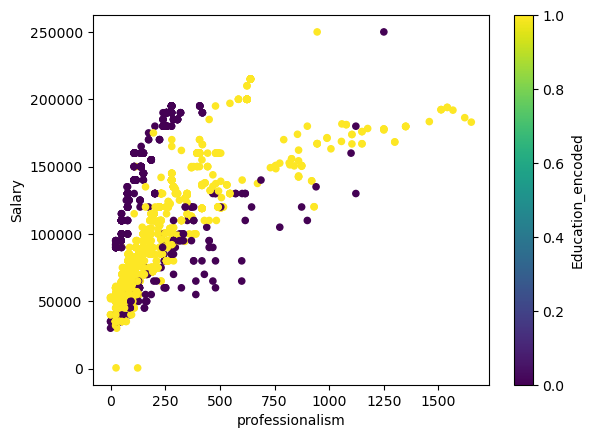

In [106]:
df['Education_encoded'] = df['Education Level'].map({"bachelor's|degr":1, 'bachelor':0})
df['Education_encoded']
ax = df.plot.scatter('professionalism','Salary', c = 'Education_encoded')

#Calculate the correlation between Education_Level_Num and Salary
correlation = df["Education_encoded"].corr(df["Salary"])

print(f"Correlation between Education_Level and Salary: {correlation:.2f}")

In [9]:
#use Gender to check corolation
df = df[['Age','Years of Experience','height','weight','professionalism','Salary','Gender']]
print(df.shape)
df.head()

(5355, 7)


,Age,Years of Experience,height,weight,professionalism,Salary,Gender
id,,,,,,,
2477,52.0,24.0,1.800316,95.021957,1150.0,175966.0,M
76,52.0,23.0,2.451414,87.456039,1100.0,160000.0,F
64,27.0,2.0,1.917509,56.997108,26.0,35000.0,M
924,32.0,11.0,2.160562,61.403169,279.0,195000.0,M
242,39.0,11.0,1.794105,72.049210,380.0,120000.0,F


In [ ]:
df_train, df_test = train_test_split(df, random_state=5, test_size=0.2)

X_train = df_train[['Age','Years of Experience','height','weight','professionalism','Gender']] #You want your X to be a table (or dataframe, 2dimensional!)

y_train = df_train["Salary"]

X_test = df_test[['Age','Years of Experience','height','weight','professionalism','Gender']]

y_test = df_test["Salary"]


X_train.shape #(4284,5)
X_test.shape  #(1072,5)
y_train.shape #(4284,)
y_test.shape  #(1072,)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"model mse: {mean_squared_error(y_test, y_pred)}")#Base Line

In [ ]:
#pd.concat([y_test,y_pred],axis=1)
#df_y = y_test.join(y_pred, on = 'id') 
print(y_pred)
y_test.values.reshape(len(y_pred))
#y_pred = y_pred.to_frame()


[ 63017.96950072 121369.45223014 124851.21454678 ... 176556.08620319
 112974.03621075  79407.66166184]


array([ 45000.,  95000., 145000., ..., 185000., 114290.,  55000.])

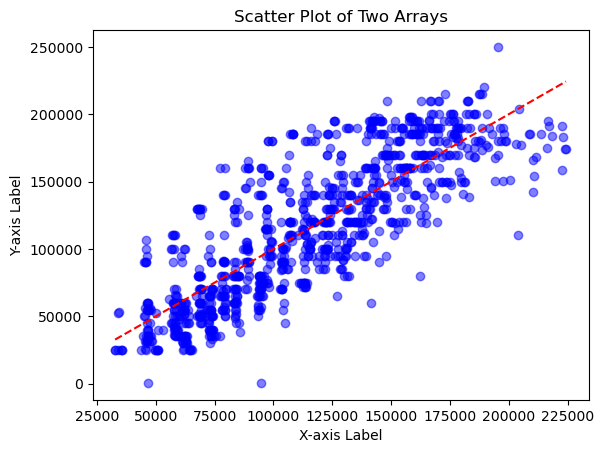

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
x = y_pred
y = y_test.values.reshape(len(y_pred))  

# Create a scatter plot
plt.scatter(x, y,alpha = 0.5,c=['blue'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')


plt.plot(np.arange(min(x), max(x) + 1), np.arange(min(x), max(x) + 1), color='r', linestyle='--', label='45-Degree Line')
plt.title('Scatter Plot of Two Arrays')

# Display the plot
plt.show()

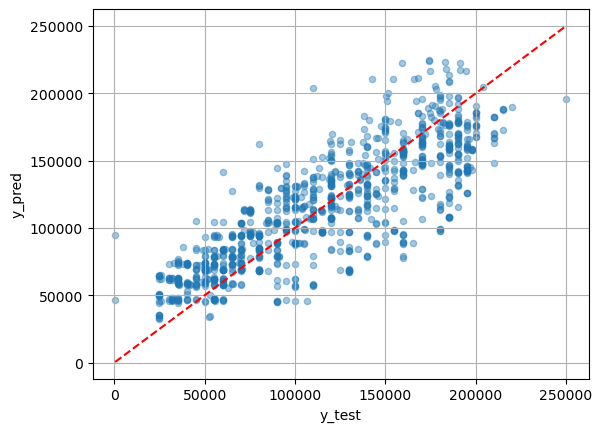

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
evaluation_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Create a scatter plot using DataFrame column names
evaluation_df.plot.scatter('y_test', 'y_pred', alpha=0.4, grid=True)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line

In [ ]:
df.columns

Index(['Age', 'Years of Experience', 'height', 'weight', 'professionalism',
       'Salary'],
      dtype='object')

In [ ]:
#def my_stupid_evaluation_function(y_test,y_pred):
#    out = np.abs(y_test-y_pred)/ y_test
#    return (out>0.1).mean()

In [ ]:
class MySuperModel:
    def __init__(self, cols):
        """cols is a list of columns"""
        self.cols = cols

    def fit(self, X, y):

        #X and y are the ones from the training set
        self.col_price_mapper_ = y.groupby([X[col] for col in self.cols]).mean().rename("y_hat")
        self.fallback_price_ = y.mean()

    def predict(self, X):
        
        """We can assume that X contains a column named self.col"""
        out = X.join(self.col_price_mapper_, on = self.cols)
        out = out["y_hat"]
        out = out.fillna(self.fallback_price_) #What we didn't predict well will be in fallback price
        return out

In [ ]:
from eval_utils import my_stupid_evaluation_function
#def my_stupid_evaluation_function(y_test,y_pred, tolerance=0.1):
#    out = np.abs(y_test-y_pred)/ y_test
#    return (out>tolerance).mean()

model mse: 485080455.94788444
performance on test 0.5102611940298507
performance on train 0.5053688141923436


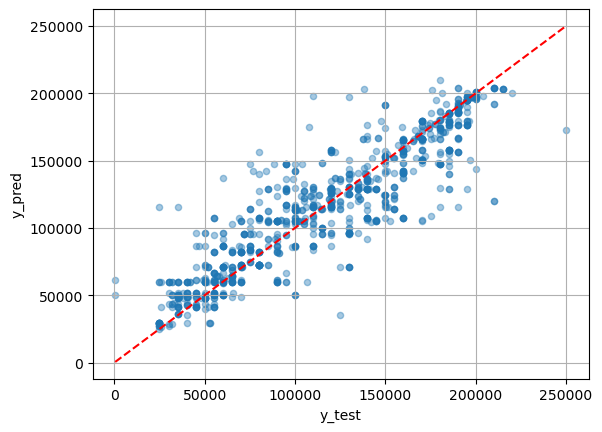

In [ ]:

#reg = MySuperModel(cols = ["x", "y", "z"]) #Overfitted model
reg = MySuperModel(cols = ['professionalism']) #Underfitted model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
print(f"model mse: {mean_squared_error(y_test, y_pred)}")
print("performance on test",  my_stupid_evaluation_function(y_test,  y_pred))
print("performance on train", my_stupid_evaluation_function(y_train, y_pred_train))

evaluation_df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluation_df.plot.scatter('y_test', 'y_pred', alpha=0.4, grid=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
#base mse:                                      840705631.066466
#professionalism                                485080455.94788444
#'Age','professionalism'                        520948337.2958939
#Years of Experience                            755449940.0420523
#'Age','Years of Experience','professionalism'  639438730.4017054

In [ ]:
#Category
#y_test.to_frame()join(y_pred)
#Copy
X_df = X_data.copy()
y_df = y_data.copy()

X_df = X_df.set_index('id')
y_df = y_df.set_index('id')
X_df.head()
y_df.head()

df_c = X_df.join(y_df, on = 'id') 
print(df_c.shape) #(5363,13))
df_c = df_c.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
print(df_c.shape) #(5363,11))
df_c = df_c[['Gender',"Education Level", "Job Title",'Country','Race','Salary']]
print(df_c.shape)
df_c.head()

(5363, 13)
(5363, 11)
(5363, 6)


,Gender,Education Level,Job Title,Country,Race,Salary
id,,,,,,
2477,M,bachelor's|degr,back|end|develope,australi,Asian,175966.0
76,F,bachelor,operations|manage,us,White,160000.0
64,M,bachelor,junior|accountan,australi,Australian,35000.0
924,M,bachelor,data|analys,u,Welsh,195000.0
242,F,bachelor,senior|product|manage,chin,Korean,120000.0


(5363, 6)
                 0
Gender           4
Education Level  3
Job Title        2
Country          0
Race             0
Salary           5


<Axes: xlabel='Gender', ylabel='Salary'>

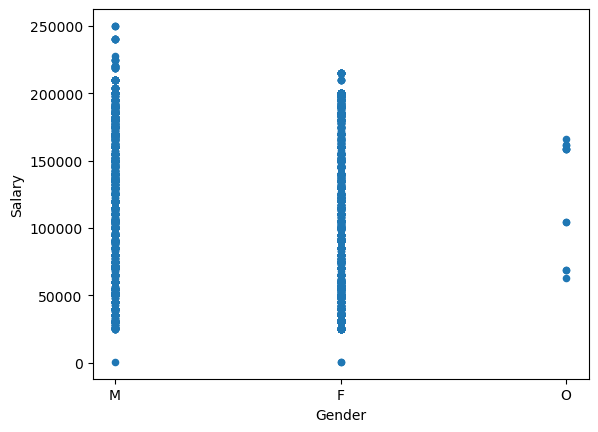

In [ ]:
#Explore nulls
#print(df_c.info())
#df_c.describe().T

print(df_c.shape)

nulls_ = pd.DataFrame(df_c.isna().sum())
print(nulls_)

df_c_dropna = df_c.dropna()
df_c_dropna.shape
#No nulls
df_c_a = df_c_dropna.isna().sum()
df_c_dropna

df_c_dropna['Gender'].value_counts()
df_c_dropna['Gender'].astype('category')


df_c_dropna.plot.scatter('Gender','Salary')



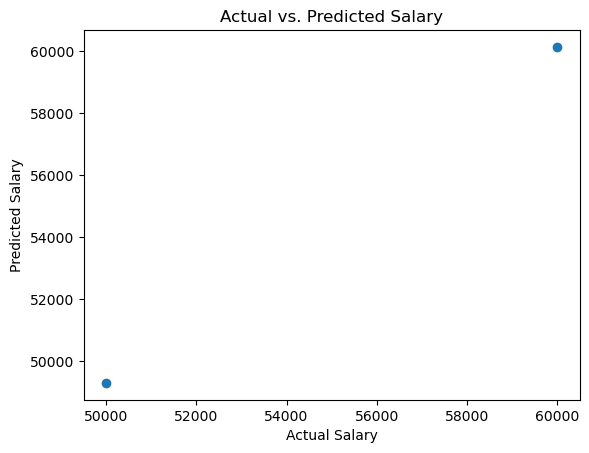

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = pd.DataFrame({
    "Education_Level": ["bachelor's|degr", "master's|degr", "p", "bachelor", "high|scho", "master"],
    "Salary": [50000, 60000, 45000, 40000, 30000, 55000]  # Replace with your actual values
})

# Map education levels to numerical values
education_mapping = {
    "high|scho": 1,
    "p": 2,
    "bachelor": 3,
    "bachelor's|degr": 4,
    "master": 5,
    "master's|degr": 6
}
data["Education_Level_Num"] = data["Education_Level"].map(education_mapping)

# Split the data into features (X) and target (y)
X = data[["Education_Level_Num"]]
y = data["Salary"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict salaries on the testing data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted salaries
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.show()
